In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
### Load dataset
df = pd.read_csv("bank-additional-full.csv")

In [6]:
### check dataset
df.head()
df.shape

(41188, 21)

In [39]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [38]:
### check duplicate 
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
### EDA Taeget check

df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [11]:
df['y'] = df['y'].map({'yes':1, 'no':0})

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
df.shape

(41176, 54)

In [14]:
X = df.drop('y', axis=1)
y = df['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
LogisticRegression(class_weight='balanced')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\sahun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_prob)

0.9261795085702865

In [27]:
y_pred_new = (y_prob > 0.6).astype(int)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[7123  142]
 [ 655  316]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7265
           1       0.69      0.33      0.44       971

    accuracy                           0.90      8236
   macro avg       0.80      0.65      0.69      8236
weighted avg       0.89      0.90      0.89      8236



In [29]:
y_pred_07 = (y_prob > 0.7).astype(int)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_07)

array([[7154,  111],
       [ 743,  228]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_07))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7265
           1       0.67      0.23      0.35       971

    accuracy                           0.90      8236
   macro avg       0.79      0.61      0.65      8236
weighted avg       0.88      0.90      0.87      8236



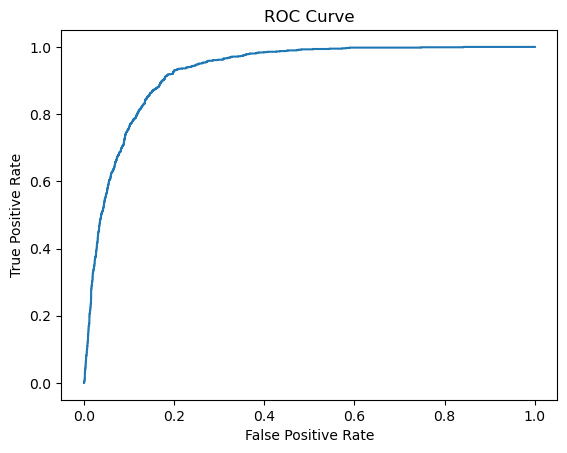

AUC Score: 0.9261795085702865


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)

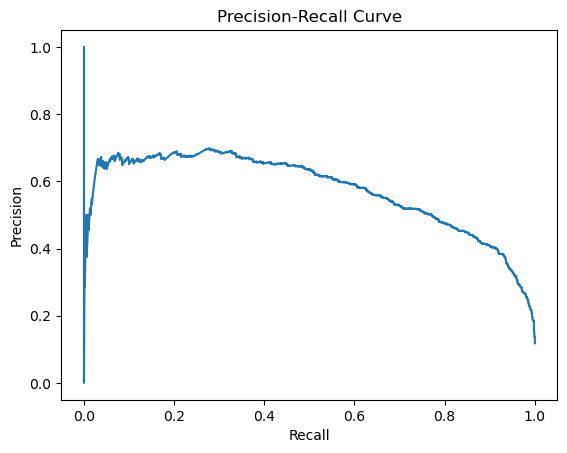

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_prob_rf = rf.predict_proba(X_test)[:,1]

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC:", roc_auc_rf)

Random Forest AUC: 0.9384149984796538


In [36]:
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[7079  186]
 [ 572  399]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.68      0.41      0.51       971

    accuracy                           0.91      8236
   macro avg       0.80      0.69      0.73      8236
weighted avg       0.90      0.91      0.90      8236



In [37]:
roc_auc_score(y_test, y_prob_rf) 

0.9384149984796538